**Apache Access log analysis Report**

**1.IMPORTING ALL REQUIRED LIBRARIES**

In [45]:
import advertools as adv
import pandas as pd
from ua_parser import user_agent_parser
import pyarrow.parquet as pq
import pyarrow
from ipywidgets import interact
import matplotlib.pyplot as plt
import ua_parser
pd.options.display.max_columns = None
import squarify

**2. Cleaning and then combined log file using adavance libarary known as **Advertool****

In [3]:
%%time
adv.logs_to_df(
    log_file='log_file.log',
    output_file='output_file.parquet',
    errors_file='errors_file.txt',
    log_format='combined')

Parsed       2,425,942 lines.
CPU times: total: 18.1 s
Wall time: 28 s


**3.1 converting it into parquet form as the data is very large, this extension will make our work easy**

**3.2 correcting the format of our datetime, to standard format.**

In [4]:
logs_df = pd.read_parquet('output_file.parquet')
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'],
                                     format='%d/%b/%Y:%H:%M:%S %z')

**4. Before, working in data we should get/ collect information about the data. This help us to get clear understanding of our data.**

In [5]:
with open('log_file.log', 'r') as file:
    for i in range(7):  # Display the first 10 lines
        print(file.readline())

87.116.74.253 - - [28/Feb/2022:14:04:44 +0200] "POST /wp-admin/admin-ajax.php HTTP/2.0" 200 47 "https://nargile.bg/wp-admin/admin.php?page=wc-settings" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.109 Safari/537.36"

91.196.124.220 - - [28/Feb/2022:14:04:47 +0200] "POST /wp-cron.php?doing_wp_cron=1646049887.2476160526275634765625 HTTP/1.1" 200 - "https://nargile.bg/wp-cron.php?doing_wp_cron=1646049887.2476160526275634765625" "WordPress/5.9.1; https://nargile.bg"

91.196.124.220 - - [28/Feb/2022:14:06:45 +0200] "POST /wp-cron.php?doing_wp_cron=1646050005.3947830200195312500000 HTTP/1.1" 200 - "https://nargile.bg/wp-cron.php?doing_wp_cron=1646050005.3947830200195312500000" "WordPress/5.9.1; https://nargile.bg"

87.116.74.253 - - [28/Feb/2022:14:06:44 +0200] "POST /wp-admin/admin-ajax.php HTTP/2.0" 200 47 "https://nargile.bg/wp-admin/admin.php?page=wc-settings" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (

In [6]:
file_path = 'log_file.log'

with open(file_path, 'r') as file:
    row_count = sum(1 for _ in file)

print(f"Number of rows in the file: {row_count}")


Number of rows in the file: 2425942


In [7]:
print(logs_df.describe())
print("-----------^^^^^^^^^^--------")
print(logs_df.info())

               size
count  2.163034e+06
mean   4.430781e+04
std    1.051124e+05
min    1.000000e+00
25%    2.148000e+03
50%    1.449800e+04
75%    4.547100e+04
max    4.354082e+06
-----------^^^^^^^^^^--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2425637 entries, 0 to 2425636
Data columns (total 9 columns):
 #   Column      Dtype   
---  ------      -----   
 0   client      object  
 1   userid      object  
 2   datetime    object  
 3   method      category
 4   request     object  
 5   status      category
 6   size        float64 
 7   referer     object  
 8   user_agent  object  
dtypes: category(2), float64(1), object(6)
memory usage: 134.2+ MB
None


**Great! Now we know the how big our data is.The type of each columns and how our data looks like.**

**So,Let's start analysis our data with the very first column which is clint that contain all IP Adresses**

**using adverstools funtion of reverse_dns_lookup we get a lot of clear insights about our ip address**

In [8]:
host_df = adv.reverse_dns_lookup(logs_df['client'])
host_df.head(5)

,ip_address,count,cum_count,perc,cum_perc,hostname,aliaslist,ipaddrlist,errors
0,178.62.71.222,69632,69632,0.028707,0.028707,None,None,None,[Errno 11004] host not found
1,178.62.81.205,68664,138296,0.028308,0.057014,None,None,None,[Errno 11004] host not found
2,46.101.77.196,68298,206594,0.028157,0.085171,None,None,None,[Errno 11004] host not found
3,91.196.124.220,40230,246824,0.016585,0.101756,ns77.superhosting.bg,,91.196.124.220,None
4,84.238.171.44,27567,274391,0.011365,0.113121,84-238-171-44.ip.btc-net.bg,,84.238.171.44,None


**5 Let's see our Top visitors and maximum frequency**

**Top Visitors: are those IP Addresses who have maximum frequency .**

**Max_frequency: are those website who has maximum traffic.**

In [25]:
 #Calculate the top visitors by counting unique client IP addresses
top_visitors = logs_df['client'].value_counts().head(10)

# Calculate the frequency of requests by counting the occurrences of each request
frequency_of_requests = logs_df['request'].value_counts().head(10)

print("Top Visitors:")
print(top_visitors)

print("\nFrequency of Requests:")
print(frequency_of_requests)

Top Visitors:
client
178.62.71.222     69632
178.62.81.205     68664
46.101.77.196     68298
91.196.124.220    40230
84.238.171.44     27567
89.25.63.48       27523
95.42.99.95       12501
82.9.84.91        11437
87.116.74.253      9882
84.238.147.161     9127
Name: count, dtype: int64

Frequency of Requests:
request
/wp-admin/admin-ajax.php                                                                  52292
/wp-content/uploads/2021/05/HLGN-Logo.png                                                 31492
/                                                                                         22741
/?wc-ajax=get_refreshed_fragments                                                         22431
/?nitroWebhook=cache_ready&token=fdccd0f43d6699b0ad7852228297d999                         20737
/superpwa-sw.js                                                                           19328
/category/nargileta/                                                                       7156
/wp-conte

**We have seen top 10 top visitors and max_frequency request site.**

**Now, lets visualise it. But we will keep our number a little small, for now its 50. otherwise, it will be difficult to see the changes**

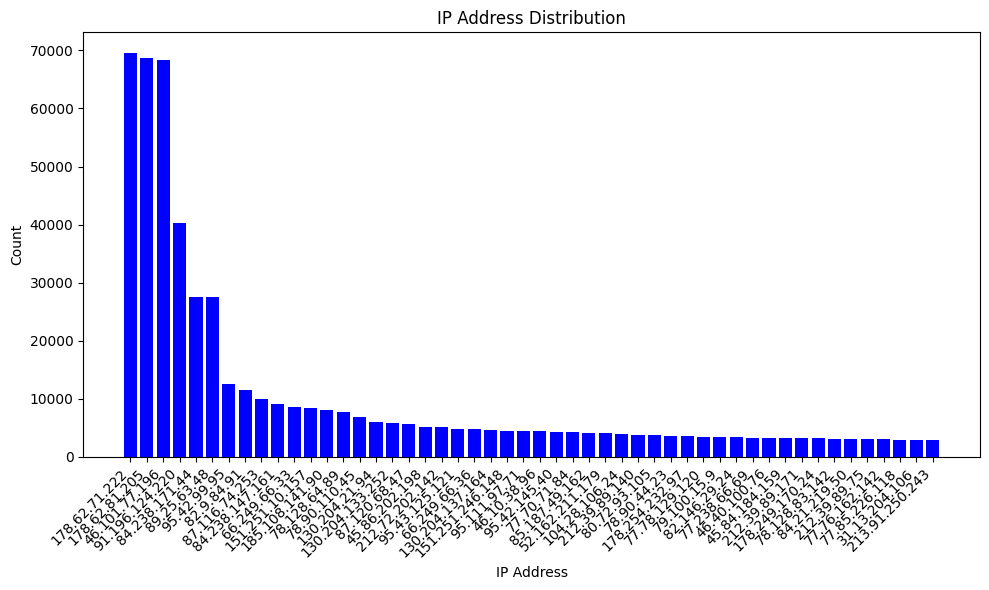

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(host_df['ip_address'].head(50), host_df['count'].head(50), color='blue')
plt.xlabel('IP Address')
plt.ylabel('Count')
plt.title('IP Address Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

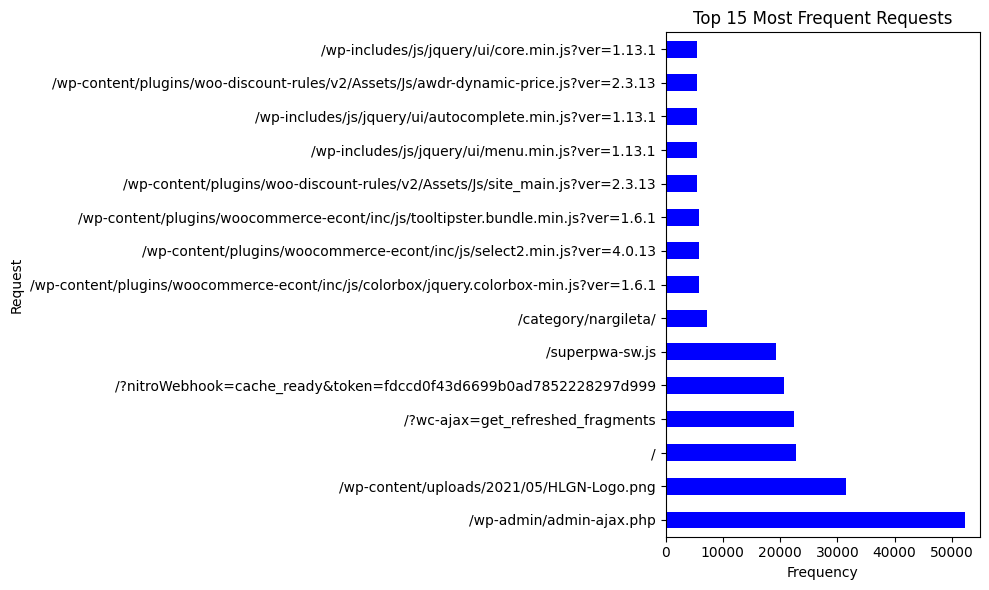

In [38]:
# Calculate the frequency of requests by counting the occurrences of each request
frequency_of_requests = logs_df['request'].value_counts().head(15)
# Plot the data using a bar plot
plt.figure(figsize=(10, 6))
frequency_of_requests.plot(kind='barh', color='blue')
plt.ylabel('Request')
plt.xlabel('Frequency')
plt.title('Top 15 Most Frequent Requests')
plt.tight_layout()
plt.show()

**6. Now, let's move a little further and take a look into our status column.**

   status    count
0     200  2187390
1     201       12
2     206      163
3     301    14376
4     302     2020
5     303        9
6     304   157070
7     400      117
8     401      542
9     403      136
10    404    53468
11    405      561
12    406     2768
13    421        2
14    500     6824
15    502        1
16    503      178


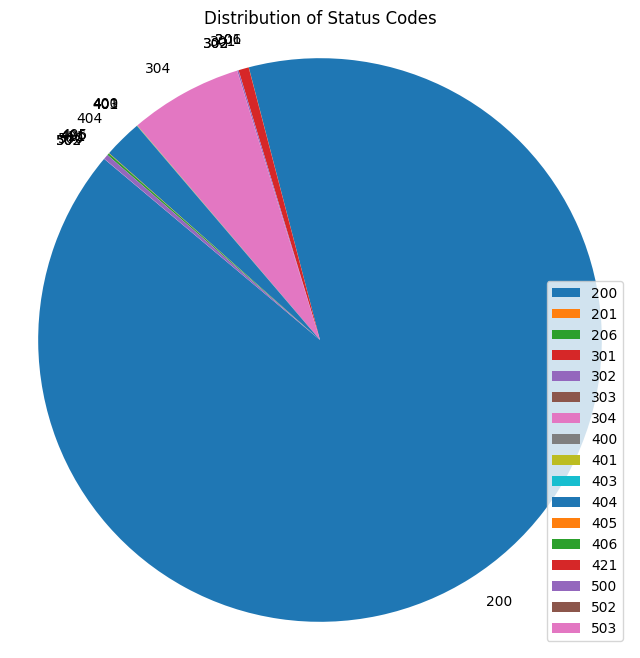

In [48]:
status_df = logs_df.groupby('status').size().reset_index(name='count')
print(status_df)
# Plot the data using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_df['count'], labels=status_df['status'], startangle=140)
plt.title('Distribution of Status Codes')
plt.axis('equal')
plt.legend(loc='lower right')
plt.show()

**By just looking our pie chart we can say,200 has cover 90% or more and that's a good news as well because 200 indicate that the request is successful, hence causing less trouble.**

**7. The date and time,is one of the important data as it helps us track records and update it time to time.Therfore, lets work on date time data now.**

**First. we'll look the number of IP Address by hour then by week**

           client  hour  request_count
0   1.145.161.207    15              7
1   1.145.180.207    15              4
2      1.53.10.52     5              1
3   100.12.47.211     6            148
4  100.16.119.204    13              1
           client  day_of_week  request_count
0   1.145.161.207            0              7
1   1.145.180.207            0              4
2      1.53.10.52            0              1
3   100.12.47.211            1            148
4  100.16.119.204            5              1


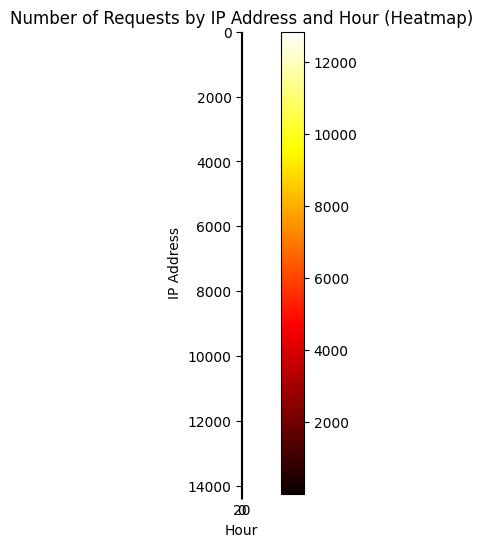

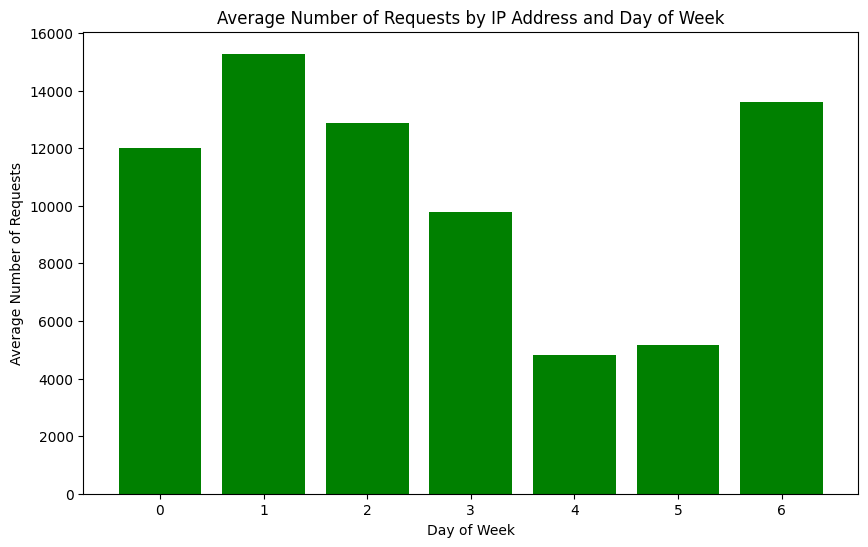

In [56]:
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'])

# Extract hour and day of the week from the "datetime" column
logs_df['hour'] = logs_df['datetime'].dt.hour
logs_df['day_of_week'] = logs_df['datetime'].dt.dayofweek

# Group by IP address and hour, and calculate the count of requests
ip_hourly_counts = logs_df.groupby(['client', 'hour'])['hour'].count().reset_index(name='request_count')

# Group by IP address and day of the week, and calculate the average request count
ip_weekly_avg = logs_df.groupby(['client', 'day_of_week'])['day_of_week'].count().reset_index(name='request_count')

print(ip_hourly_counts.head(5))
print(ip_weekly_avg.head(5))

# Convert the "datetime" column to datetime data type, setting utc=True
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'], utc=True)

# Extract hour and day of the week from the "datetime" column
logs_df['hour'] = logs_df['datetime'].dt.hour
logs_df['day_of_week'] = logs_df['datetime'].dt.dayofweek

# Group by IP address and hour, and calculate the count of requests
ip_hourly_counts = logs_df.groupby(['client', 'hour'])['hour'].count().reset_index(name='request_count')

# Create the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(ip_hourly_counts.pivot_table(index='client', columns='hour', values='request_count', aggfunc=sum), cmap='hot')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('IP Address')
plt.title('Number of Requests by IP Address and Hour (Heatmap)')
plt.colorbar()

# Group by IP address and day of the week, and calculate the average request count
ip_weekly_avg = logs_df.groupby(['client', 'day_of_week'])['day_of_week'].count().reset_index(name='request_count')

# Visualize the weekly average request counts
plt.figure(figsize=(10, 6))
plt.bar(ip_weekly_avg['day_of_week'], ip_weekly_avg['request_count'], color='green')

# Add labels and title
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Requests')
plt.title('Average Number of Requests by IP Address and Day of Week')

# Show the plots
plt.show()


**8. It's time explore our url and browers. It helps to understand the maximum user's platform and operatinf system, using which we can come up with so many conclusions.** 

   browser  total_hits
0   Chrome     1167941
5   Safari      670507
4    Other      433642
2  Firefox       58765
3    Opera       50790
1     Edge       43992


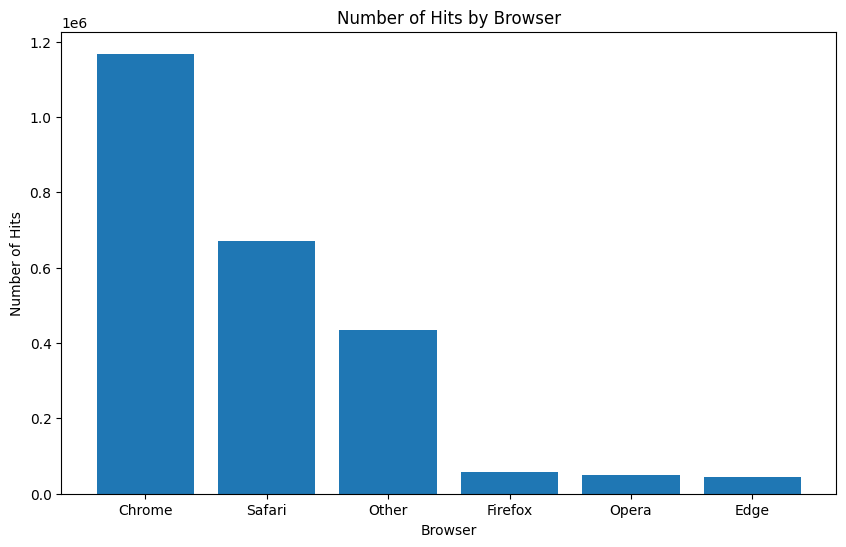

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
# Parse user agents using the user-agents library
def extract_browser(user_agent):
    ua = parse(user_agent)
    browser_family = ua.browser.family.lower()
    
    if 'chrome' in browser_family:
        return 'Chrome'
    elif 'firefox' in browser_family:
        return 'Firefox'
    elif 'safari' in browser_family:
        return 'Safari'
    elif 'edge' in browser_family:
        return 'Edge'
    elif 'opera' in browser_family:
        return 'Opera'
    elif 'brave' in browser_family:
        return 'Brave'
    elif 'internet explorer' in browser_family or 'msie' in browser_family:
        return 'Internet Explorer'
    else:
        return 'Other'

logs_df['browser'] = logs_df['user_agent'].apply(extract_browser)

# Group data by browser and count hits
browser_hits = logs_df.groupby('browser').size().reset_index(name='total_hits')

# Sort by total hits
browser_hits = browser_hits.sort_values(by=['total_hits'], ascending=False)
print(browser_hits)
# Create a bar chart of the number of hits for each browser
plt.figure(figsize=(10, 6))
plt.bar(browser_hits['browser'], browser_hits['total_hits'])

# Add labels and title
plt.xlabel('Browser')
plt.ylabel('Number of Hits')
plt.title('Number of Hits by Browser')

# Show the plot
plt.show()


**By above we can clearly see, that maximum user are using chrome.**

**9. We have came so far, explored lot of data but it's not finished yet. now it's time to more advance visulisation.**

**First: Number of hits in a site by hour**

**Second: Number of total hits by hour**

site  91.196.124.134  91.196.124.134:80  Unknown  accounts.google.com   
hour                                                                    
23               NaN                1.0   4823.0                  NaN  \
22               NaN                2.0   5470.0                  NaN   
21               NaN                NaN   4790.0                  NaN   
20               NaN                NaN   6292.0                  NaN   
19               NaN                1.0   7322.0                  NaN   

site  app.jasper.ai  app.ringcentral.com  autodiscover.nargile.bg  baidu.com   
hour                                                                           
23              NaN                  NaN                      NaN        NaN  \
22              NaN                  NaN                      NaN        NaN   
21              NaN                  NaN                      NaN        NaN   
20              NaN                  NaN                      NaN        NaN   
19      

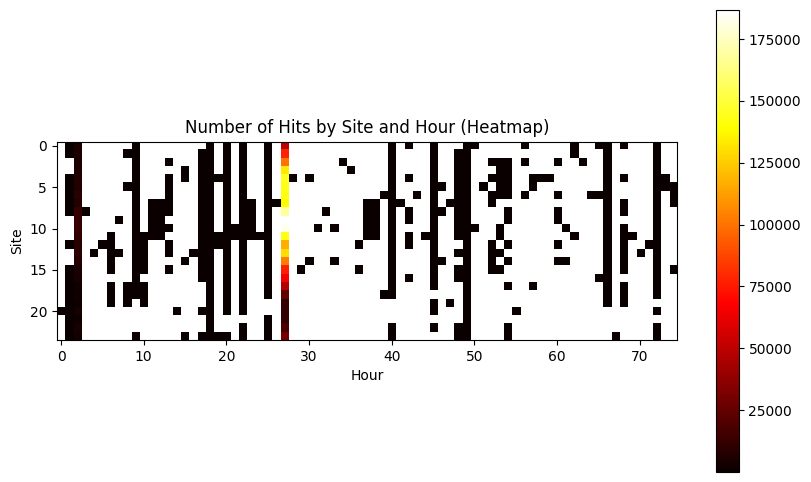

In [78]:

# Parse the referer using the function defined above
def extract_site(referer):
    if pd.isna(referer):
        return 'Direct'
    else:
        referer_parts = referer.split('/')
        if len(referer_parts) >= 3:
            return referer_parts[2]
        else:
            return 'Unknown'

logs_df['site'] = logs_df['referer'].apply(extract_site)

# Group data by site and hour and count hits
site_hourly_hits = logs_df.groupby(['site', 'hour']).size().reset_index(name='hits')

# Pivot the table for site distribution per hour
site_hourly_pivot = site_hourly_hits.pivot(index='hour', columns='site', values='hits')

# Sort by total hits for each hour
site_hourly_pivot = site_hourly_pivot.sort_values(by=['hour'], ascending=False)
print(site_hourly_pivot.head(5))
# Create a heatmap of the number of hits for each site and hour
plt.figure(figsize=(10, 6))
plt.imshow(site_hourly_pivot, cmap='hot')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Site')
plt.title('Number of Hits by Site and Hour (Heatmap)')
plt.colorbar()
plt.show()

    hour  total_hits
0      0       33146
1      1       21309
2      2       13985
3      3       16258
4      4       13898
5      5       27534
6      6       50027
7      7       70357
8      8       82889
9      9      111783
10    10      140118
11    11      125931
12    12      154217
13    13      195853
14    14      199640
15    15      180966
16    16      146061
17    17      152252
18    18      151349
19    19      153525
20    20      140750
21    21      105449
22    22       83788
23    23       54552


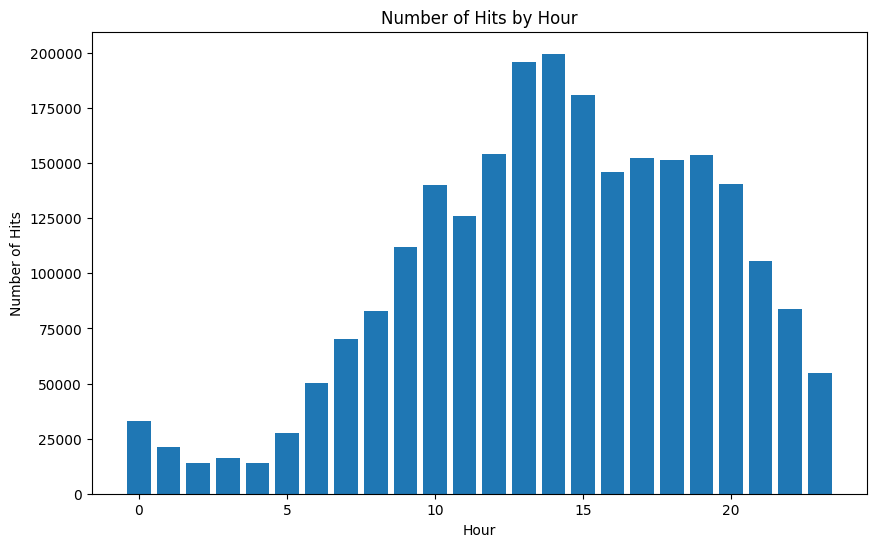

In [81]:
# Group data by hour and count hits
hourly_hits = logs_df.groupby('hour').size().reset_index(name='total_hits')
print(hourly_hits)
# Sort by total hits
#hourly_hits = hourly_hits.sort_values(by=['total_hits'], ascending=False)

# Create a bar chart of the number of hits for each hour
plt.figure(figsize=(10, 6))
plt.bar(hourly_hits['hour'], hourly_hits['total_hits'])

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Number of Hits')
plt.title('Number of Hits by Hour')

# Show the plot
plt.show()


**Finally, reach to last part**

**10.lets see together the operating system and device type together**

In [82]:
%%time
ua_df = pd.json_normalize([user_agent_parser.Parse(ua) for ua in logs_df['user_agent']])
ua_df.columns = 'ua_' + ua_df.columns.str.replace('user_agent\.', '', regex=True)

CPU times: total: 24.8 s
Wall time: 52.2 s


In [83]:
ua_df.head(100)

,ua_string,ua_family,ua_major,ua_minor,ua_patch,ua_os.family,ua_os.major,ua_os.minor,ua_os.patch,ua_os.patch_minor,ua_device.family,ua_device.brand,ua_device.model
0,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,Chrome Mobile,99,0,4844,Android,12,None,None,None,Samsung SM-G991B,Samsung,SM-G991B
1,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,Chrome Mobile,99,0,4844,Android,12,None,None,None,Samsung SM-G991B,Samsung,SM-G991B
2,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,Chrome Mobile,99,0,4844,Android,12,None,None,None,Samsung SM-G991B,Samsung,SM-G991B
3,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,Chrome Mobile,99,0,4844,Android,12,None,None,None,Samsung SM-G991B,Samsung,SM-G991B
4,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,Chrome Mobile,99,0,4844,Android,12,None,None,None,Samsung SM-G991B,Samsung,SM-G991B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,WordPress/5.9.1; https://nargile.bg,WordPress,5,9,1,Other,None,None,None,None,Spider,Spider,Desktop
96,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,Chrome Mobile,99,0,4844,Android,12,None,None,None,Samsung SM-G991B,Samsung,SM-G991B
97,Mozilla/5.0 (Linux; Android 11; SM-A515F) Appl...,Chrome Mobile,99,0,4844,Android,11,None,None,None,Samsung SM-A515F,Samsung,SM-A515F
98,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,Chrome,99,0,4844,Windows,7,None,None,None,Other,None,None


In [117]:
import matplotlib.pyplot as plt
import pandas as pd
# Create a new dataframe that only contains the `ua_family` and `ua_os.family` columns
browser_os_df = ua_df[['ua_family', 'ua_os.family']]
# Count the number of occurrences of each browser and operating system combination
browser_os_counts = browser_os_df.groupby(['ua_family', 'ua_os.family']).size().reset_index(name='count')
print(browser_os_counts.head(10))

          ua_family ua_os.family  count
0               AOL      Windows      1
1     AdsBot-Google        Other      8
2         AhrefsBot        Other   2933
3           Android      Android    366
4  AppEngine-Google        Other      5
5        Apple Mail     Mac OS X      8
6          Applebot     Mac OS X   5731
7      AwarioRssBot        Other      2
8          Basilisk      Windows      1
9       BingPreview      Windows    630


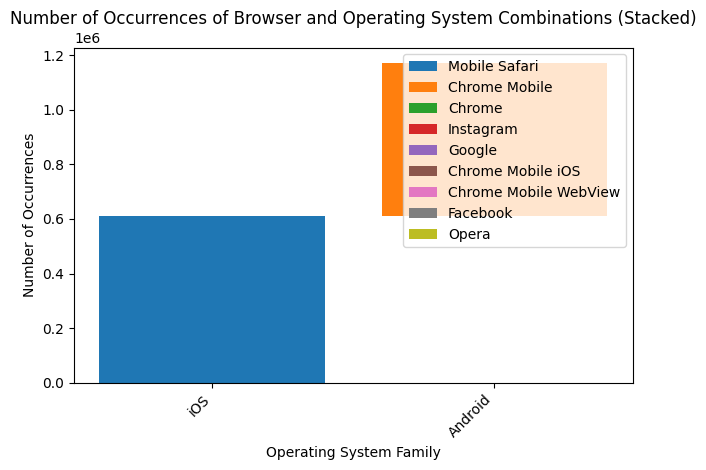

In [116]:

df = browser_os_counts.head(10)

# Get unique browser names for legend
browser_names = df['ua_family'].unique()

# Initialize the bottom for stacking
bottom = None

# Create a stacked bar chart
for browser_name in browser_names:
    browser_data = df[df['ua_family'] == browser_name]
    plt.bar(browser_data['ua_os.family'], browser_data['count'], label=browser_name, bottom=bottom)
    if bottom is None:
        bottom = browser_data['count']
    else:
        bottom += browser_data['count']

# Add labels and title
plt.xlabel('Operating System Family')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences of Browser and Operating System Combinations (Stacked)')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()